The theory behind this example can be found in Greiner Relativistic Quantum Mechanics book

This has been summarized by a blog post "https://physicspages.com/Greiner%20RQM.html" 

I have reproduced the calculations which can be found at "../docs/SKGCP/Ex1_10.pdf"

- There is a discrepecy however with the differential equation I find compared to Greiner, however the results dont change all that much, and as such I have taken Greiners word for it and assume I have made a mistake in the calculation 
- pg(6) of my calcs

# Pionic Atom with point like Nucleus

## Problem
Find the solution of the KG equation for the π meson in a Coulomb potential and discuss the energy eigenvalues. The pion has ass 139.577 MeV and Spin 0. It therefore obeys the KG equation.

In [271]:
using Plots, QuadGK

In [257]:
include("../../Constants/src/Short.jl")
m0 = 139.577;

### 1st step
Once we have inputted the potential into the general formula (9) and (10) we can make some useful definitions

In [258]:
β(ε) = 2*sqrt(m0^2*c^4 - ε^2)/(ħ*c)
function ρ(r,ε) 
    return β(ε)*r >= 0 ? β(ε)*r : error("ρ must be +VE!")
end
Z = 1
l = 0
μ(Z) = sqrt((l+1/2)^2 - (Z*α)^2)
λ(ε) = -m0*c^2 ≤ ε ≤ m0*c^2 ? (2Z*α*ε)/(ħ*c*β(ε)) : error("Not a bund state")

λ (generic function with 2 methods)

### 2nd Step
Now we have redefined the ODE, we can look at how it behacves in the extremes. In doing so we choose a polynomial solution in terms of ν

We can work out a solution for this approximately analytically.

however I would still like to be able to do this numerically, for more general cases.

In [259]:
ν(Z) = 1/2 + μ(Z)

ν (generic function with 1 method)

We can see that the current definition of μ is only real for values of Z $\leq$ 68 or more concisely $Z\alpha \leq 1/2$

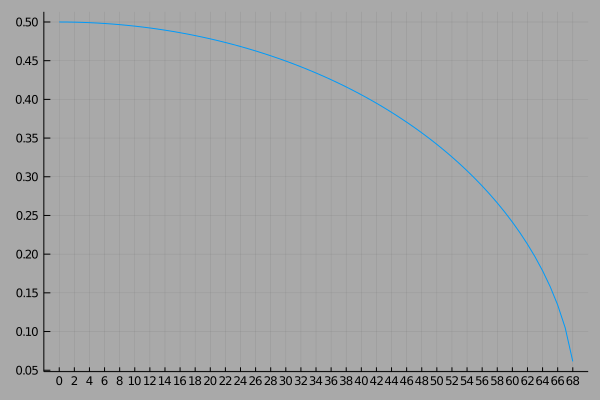

In [260]:
plot([Z for Z in 0:68], Z -> μ(Z), background_color="darkgrey", legend=false, xticks=[i for i in 0:2:68], 
    yticks=[i for i in 0:0.05:0.5])

We choose the Radial wavefunction to have the form (15)

_₂F₁ is the Gaussian hyperbolic function that becomes asymptotically close to the confluent Hypergeometric function as $a\longrightarrow \infty$, this can be found inside the package HypergeometricFunctions

However we need to be able put an upper limit on the summation for the purposes of normalizaton, so instead we can make our own approximation using a recurrence relation

In [261]:
function f(r,ε; N=10, a0=1, kw...)
    Z = try Z == Int catch nothing end == nothing ? 10 : Z
    S = Float64[]
    a = ν(Z)-λ(ε)
    b = 2ν(Z)
    
    push!(S, a0)
    
    for i in 2:N
        push!(S, S[i-1]*((a+i-1)*ρ(r,ε))/(b+i-1))
    end
    return sum(S)
end

f (generic function with 2 methods)

In [262]:
function R(r ,ε; Z::Int=1) 
    return ρ(r,ε)^(ν(Z))*exp(-ρ(r,ε)/2)*f(r,ε; Z=Z)
end

R (generic function with 2 methods)

### 3rd Step
after having made logical constraints, we are naturally led to the energy values (22)

In [263]:
function ε(n,l; Z=10, m0=m0)
    rest = m0*c^2
    return rest/sqrt(1+((Z*α)^2)/(n-l-1/2+sqrt((l+1/2)^2-(Z*α)^2))^2)
end

ε (generic function with 1 method)

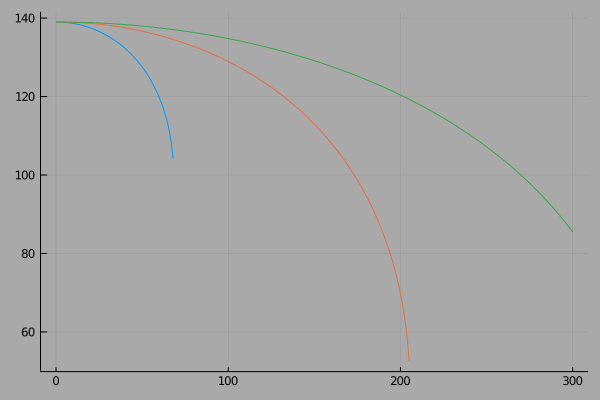

In [264]:
plot([Z for Z in 0:1:68], Z -> ε(1,0,Z=Z, m0=139), background_color="darkgrey", legend=false)
plot!([Z for Z in 0:1:205], Z -> ε(2,1,Z=Z, m0=139))
plot!([Z for Z in 0:1:300], Z -> ε(3,2,Z=Z, m0=139))

### 4th Step
feed the energies values back into the previous formulation

In [265]:
β(n,l; kw...) = 2*sqrt(m0^2*c^4 - ε(n,l; kw...)^2)/(ħ*c)

β (generic function with 2 methods)

In [266]:
function ρ(r,n,l; kw...)
    return β(n,l; kw...)*r >= 0 ? β(n,l; kw...)*r : error("ρ must be +VE!")
end
Z = 1
l = 0
μ(Z) = sqrt((l+1/2)^2 - (Z*α)^2)
λ(n,l; kw...) = -m0*c^2 ≤ ε(n,l; kw...) ≤ m0*c^2 ? (2Z*α*ε(n,l; kw...))/(ħ*c*β(n,l; kw...)) : error("Not a bund state")

λ (generic function with 2 methods)

In [267]:
ν(Z) = 1/2 + μ(Z)

ν (generic function with 1 method)

In [300]:
function f(r,n,l; N=10, a0=1, kw...)
    try Z == Int catch nothing end == nothing ? Z = 10 : Z = Z
    S = Float64[]
    a = (2Z*α*ε(n,l; kw...))/(ħ*c*β(n,l; kw...))
    b = 2*μ(Z) + 1
    
    push!(S, a0)
    
    for i in 2:N
        push!(S, S[i-1]*((a+i-1)*ρ(r,n,l; kw...))/(b+i-1))
    end
    return sum(S)
end

f (generic function with 2 methods)

In [301]:
function R(r,n,l; kw...)
    return N*ρ(r,n,l; kw...)^(ν(Z))*exp(-ρ(r,n,l; kw...)/2)*f(r,n,l; kw...)
end

R (generic function with 2 methods)

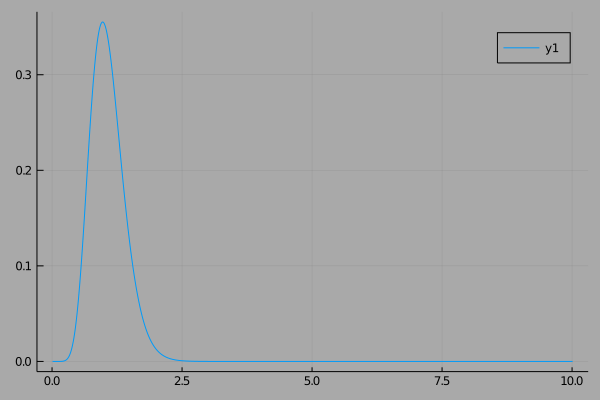

In [302]:
plot([r for r in 0.01:0.01:10.01], r -> R(r,1,0; Z=10), background_color="darkgrey")

We can normalize with the condition that:

$$4π \int_0^\infty ρ(r)r^2\mathrm{d}r = \text{Z}$$

In [299]:
N = sqrt(10/(4π*quadgk(r -> ρ(r,1,0)*r^2, 0,10000)[1]))

3.947640663577242e-9